# Map Data Extraction from OSM File

This notebook demonstrates how to extract and visualize map data from an OpenStreetMap (OSM) PBF file using OSMnx.

## Step 1: Install Required Libraries

First, we need to install OSMnx and its dependencies.

In [ ]:
#!pip install osmnx geopandas matplotlib


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\maxyj\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## Step 2: Import Libraries

In [2]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Configure OSMnx
ox.settings.use_cache = True
ox.settings.log_console = True

print(f"OSMnx version: {ox.__version__}")

OSMnx version: 2.0.6


## Step 3: Load Data from OSM PBF File

OSMnx can work with OSM PBF files by converting them to graphs or GeoDataFrames. We'll use the `graph_from_xml` function after converting the PBF to XML, or we can use geopandas to read the file directly.

In [3]:
# Define the OSM file path
osm_file = "malaysia-singapore-brunei-251009.osm.pbf"

# Read the OSM PBF file using geopandas
# Note: This reads all features. You can filter by layer type.
try:
    gdf = gpd.read_file(osm_file)
    print(f"Loaded {len(gdf)} features")
    print(f"\nAvailable layers: {gdf.geometry.type.unique()}")
    print(f"\nData columns: {gdf.columns.tolist()}")
except Exception as e:
    print(f"Error loading file: {e}")
    print("\nAlternative: We'll use OSMnx to query specific areas from the region")

Loaded 467899 features

Available layers: ['Point']

Data columns: ['osm_id', 'name', 'barrier', 'highway', 'ref', 'address', 'is_in', 'place', 'man_made', 'other_tags', 'geometry']


## Step 4: Extract Street Network from a Specific Location

Since PBF files can be large, let's extract data for a specific city or region. We'll use Kuala Lumpur as an example.

In [4]:
# Extract street network for a specific place
place_name = "Kuala Lumpur, Malaysia"

try:
    # Get the street network graph
    G = ox.graph_from_place(place_name, network_type='drive')
    print(f"Loaded graph with {len(G.nodes)} nodes and {len(G.edges)} edges")
except Exception as e:
    print(f"Error: {e}")
    print("Try using a different location or bounding box")

Loaded graph with 20746 nodes and 44187 edges


## Step 5: Visualize the Street Network

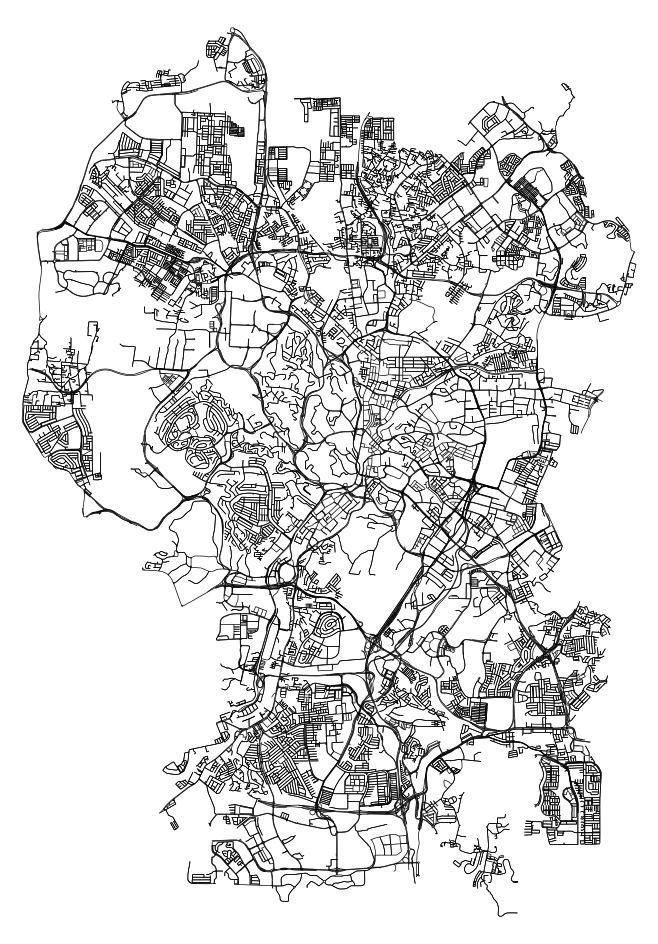

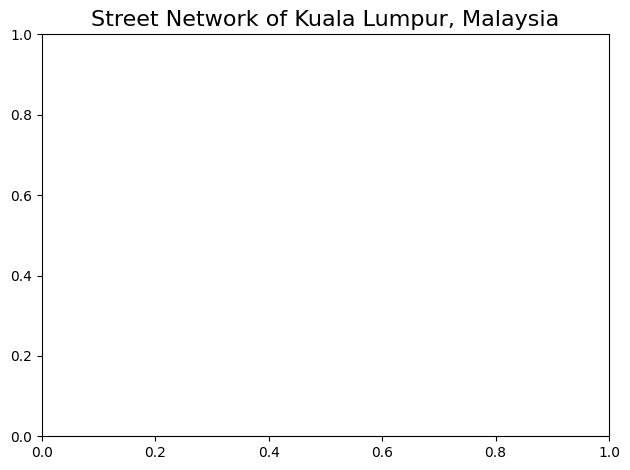

In [5]:
# Visualize the street network
fig, ax = ox.plot_graph(G, node_size=0, edge_linewidth=0.5, 
                         bgcolor='white', edge_color='black',
                         figsize=(12, 12))
plt.title(f"Street Network of {place_name}", fontsize=16)
plt.tight_layout()
plt.show()

## Step 6: Extract Buildings

In [6]:
# Extract buildings
try:
    buildings = ox.features_from_place(place_name, tags={'building': True})
    print(f"Extracted {len(buildings)} buildings")
    print(f"\nBuilding types: {buildings['building'].value_counts().head(10)}")
except Exception as e:
    print(f"Error extracting buildings: {e}")

Extracted 122057 buildings

Building types: building
house                 62589
yes                   25822
retail                 7575
commercial             5256
apartments             3575
residential            3286
semidetached_house     3156
roof                   3140
industrial             2471
terrace                1290
Name: count, dtype: int64


## Step 7: Visualize Buildings

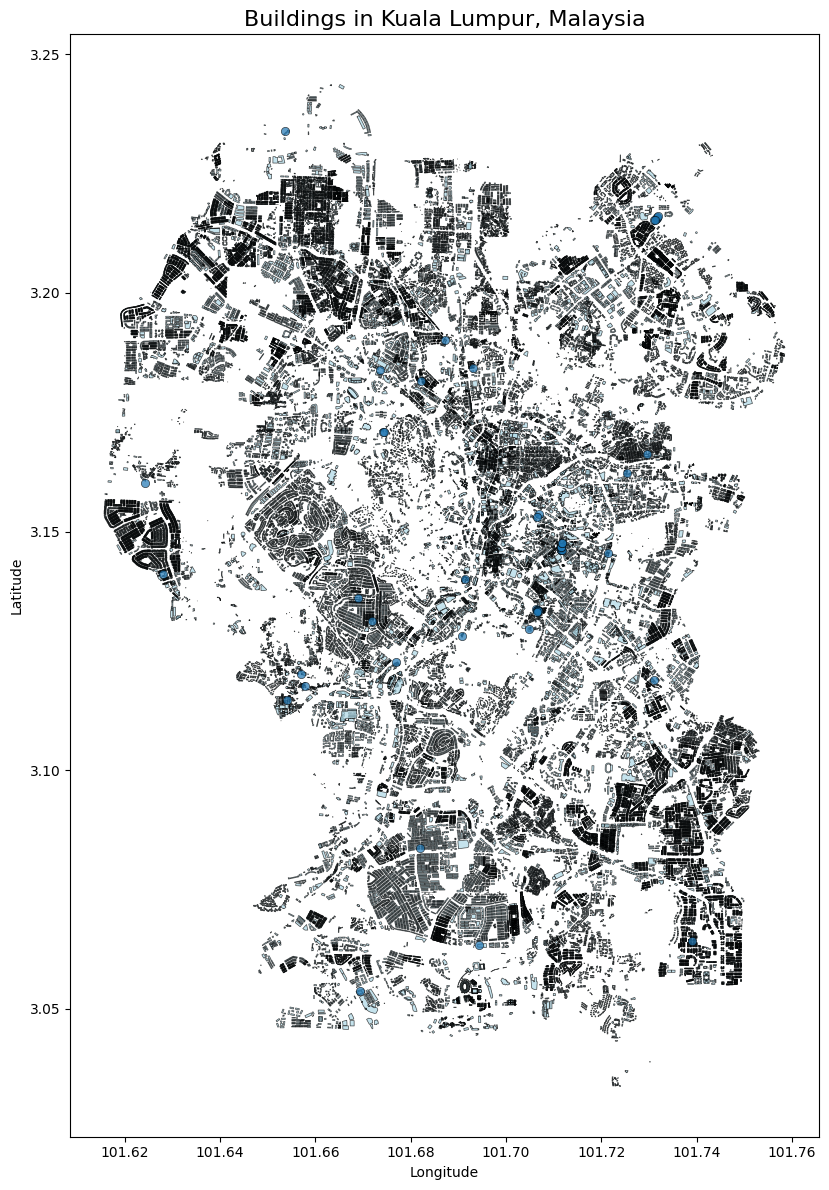

In [7]:
# Visualize buildings
fig, ax = plt.subplots(figsize=(12, 12))
buildings.plot(ax=ax, facecolor='lightblue', edgecolor='black', linewidth=0.5, alpha=0.7)
ax.set_title(f"Buildings in {place_name}", fontsize=16)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.tight_layout()
plt.show()

## Step 8: Extract Other Features (POIs, Amenities, etc.)

In [8]:
# Extract Points of Interest (POIs) - e.g., restaurants, shops, etc.
try:
    pois = ox.features_from_place(place_name, tags={'amenity': True})
    print(f"Extracted {len(pois)} POIs")
    print(f"\nTop amenity types:\n{pois['amenity'].value_counts().head(10)}")
except Exception as e:
    print(f"Error extracting POIs: {e}")

Extracted 11411 POIs

Top amenity types:
amenity
restaurant          2449
parking             1367
cafe                 716
parking_entrance     682
place_of_worship     578
fast_food            441
school               406
clinic               392
parking_space        340
bank                 323
Name: count, dtype: int64


## Step 9: Combined Visualization (Streets + Buildings)

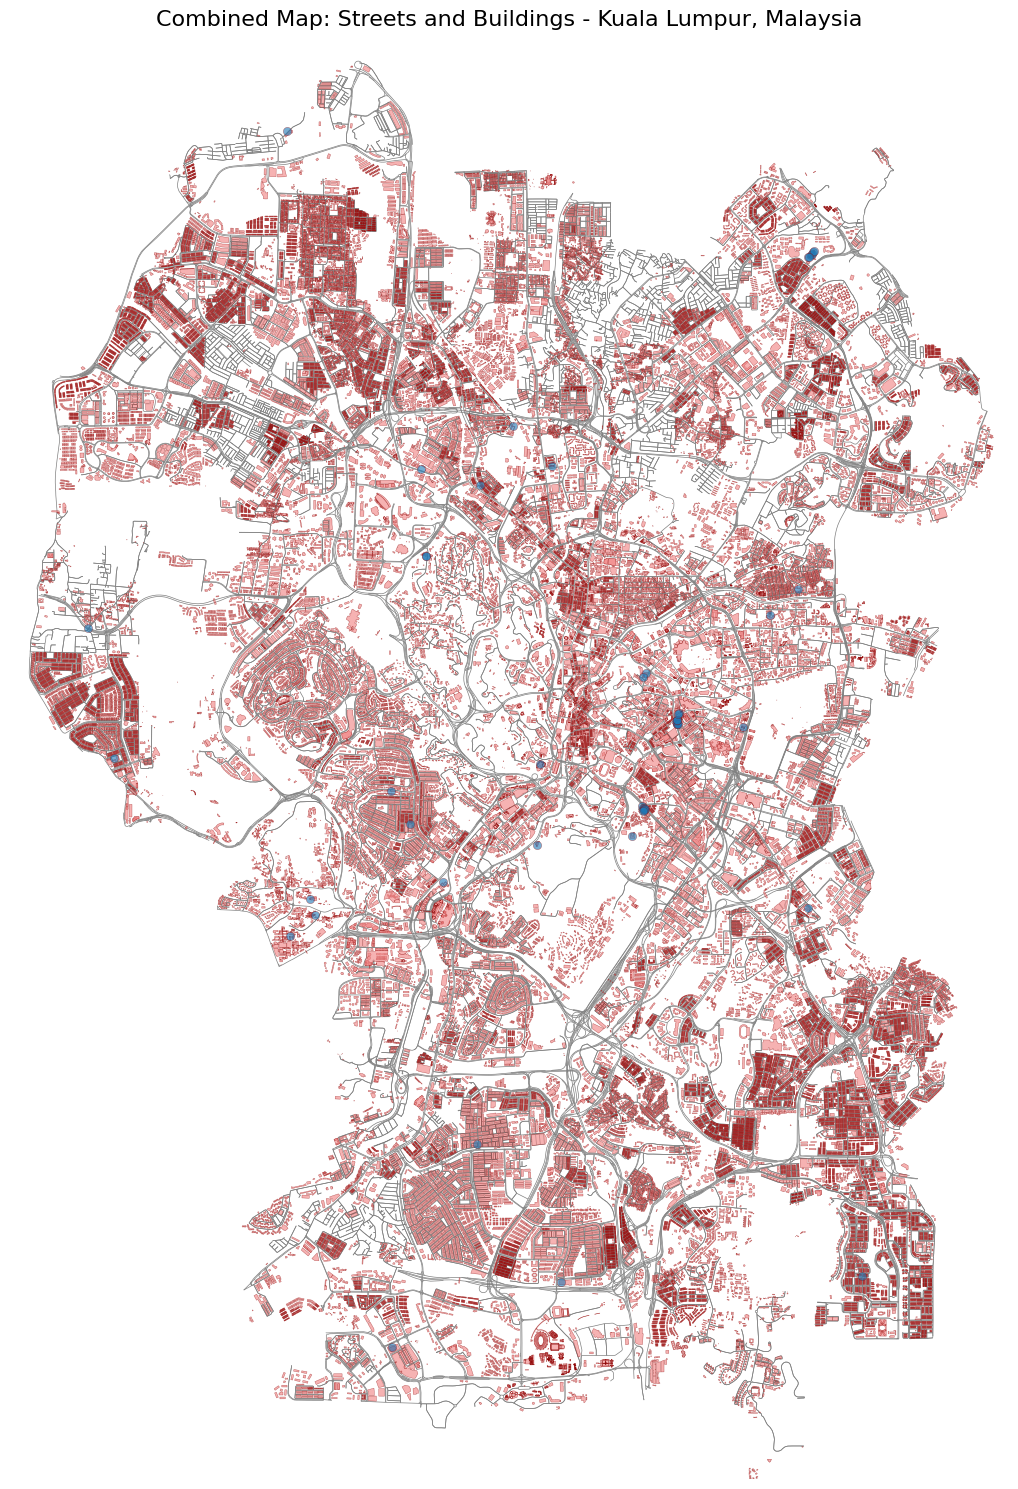

In [9]:
# Combined visualization
fig, ax = plt.subplots(figsize=(15, 15))

# Plot streets
ox.plot_graph(G, ax=ax, node_size=0, edge_linewidth=0.5, 
              edge_color='gray', bgcolor='white', show=False, close=False)

# Overlay buildings
if 'buildings' in locals():
    buildings.plot(ax=ax, facecolor='lightcoral', edgecolor='darkred', 
                   linewidth=0.3, alpha=0.6)

ax.set_title(f"Combined Map: Streets and Buildings - {place_name}", fontsize=16)
plt.tight_layout()
plt.show()

## Step 10: Working Directly with Bounding Box

If you want to extract data from a specific area within your PBF file, use a bounding box (north, south, east, west coordinates).

Loaded graph from bbox with 18 nodes and 18 edges


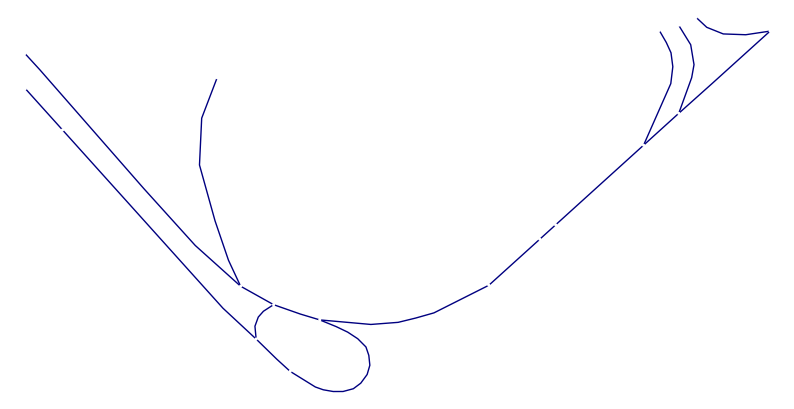

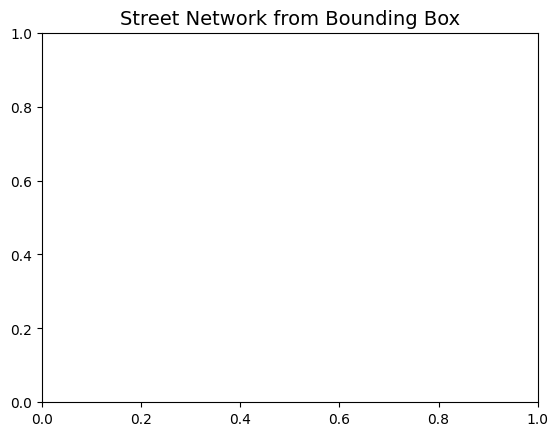

In [11]:
# Example: Extract data from a bounding box
# Coordinates for central Kuala Lumpur
north, south, east, west = 3.16, 3.13, 101.70, 101.67

try:
    G_bbox = ox.graph_from_bbox(bbox=[north, south, east, west], network_type='drive')
    print(f"Loaded graph from bbox with {len(G_bbox.nodes)} nodes and {len(G_bbox.edges)} edges")
    
    # Visualize
    fig, ax = ox.plot_graph(G_bbox, node_size=5, edge_linewidth=1, 
                             bgcolor='white', edge_color='navy',
                             figsize=(10, 10))
    plt.title("Street Network from Bounding Box", fontsize=14)
    plt.show()
except Exception as e:
    print(f"Error: {e}")